In [1]:
!pip install matplotlib scipy numpy

  Using cached matplotlib-3.10.7-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached numpy-2.3.4-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x

Total recording duration: 438.54 seconds (7.31 minutes)
Sampling rate: 2000 Hz
Total samples: 877073
Unique gesture labels in data: [ 0 41 42 43 44 45 46 47 48 49]
Gesture 0 (Rest): 329523 samples (164.76 seconds)
Gesture 41 (Spherical grip): 60818 samples (30.41 seconds)
Gesture 42 (Tip grip): 60873 samples (30.44 seconds)
Gesture 43 (Palmar grip): 60752 samples (30.38 seconds)
Gesture 44 (Lateral grip): 60927 samples (30.46 seconds)
Gesture 45 (Tripod grip): 60866 samples (30.43 seconds)
Gesture 46 (Power grip): 60821 samples (30.41 seconds)
Gesture 47 (Index point): 60869 samples (30.43 seconds)
Gesture 48 (Flat hand): 60862 samples (30.43 seconds)
Gesture 49 (Wrist supination/pronation): 60762 samples (30.38 seconds)

Total gesture segments: 108
Unique repetition numbers: [0 1 2 3 4 5 6]


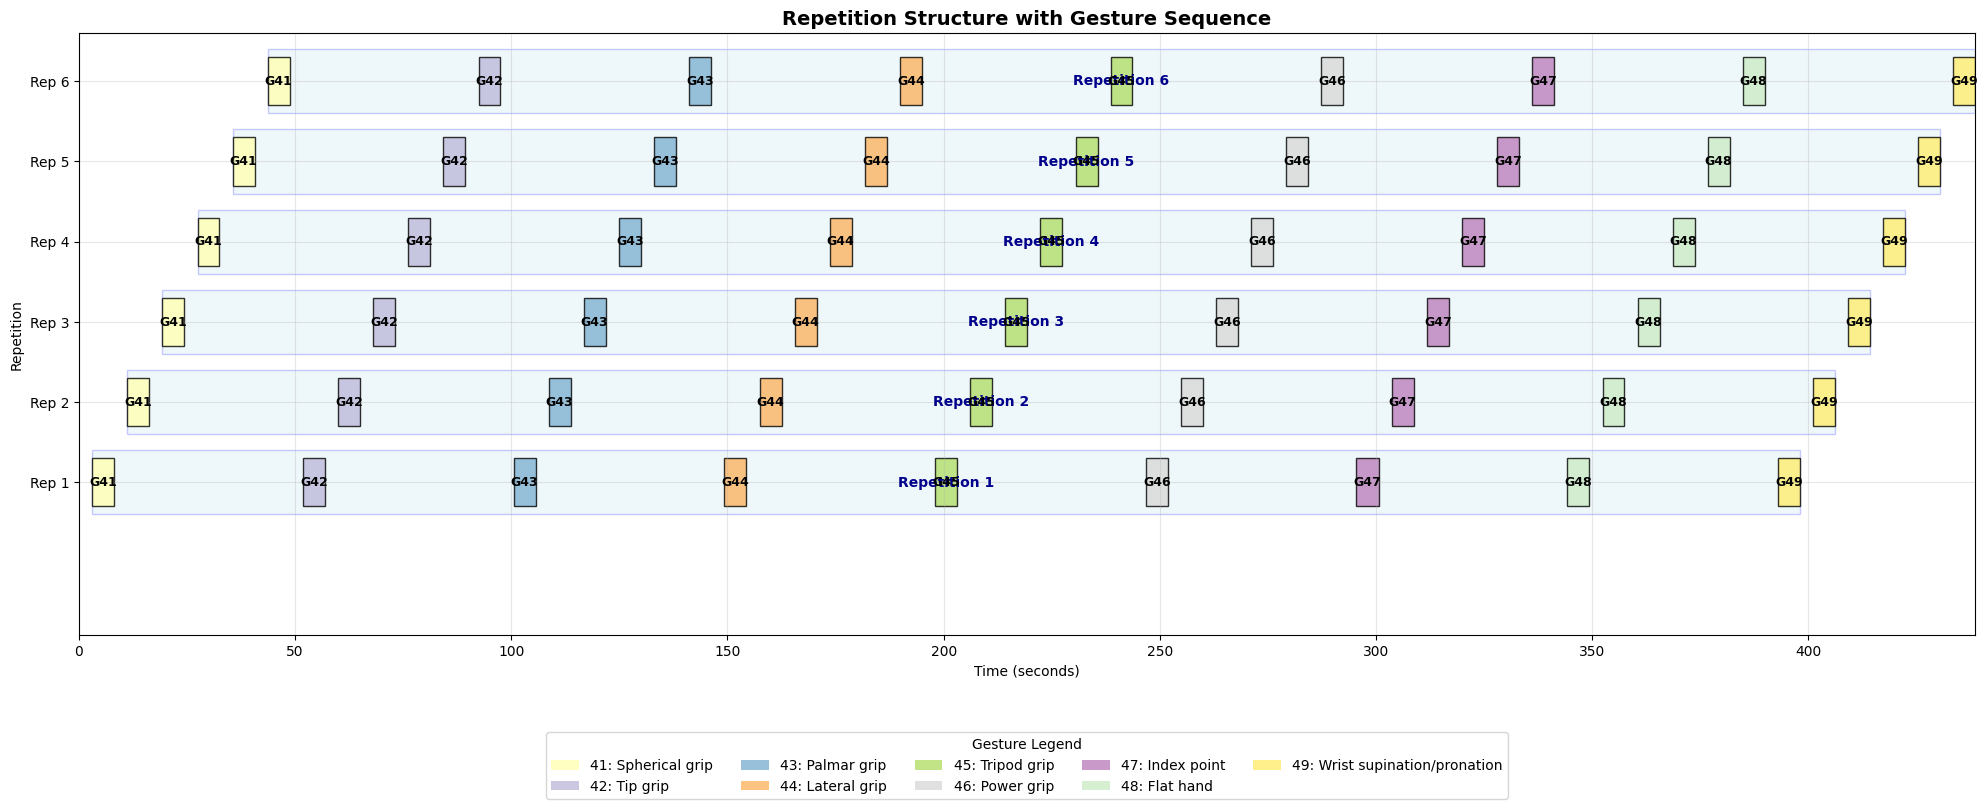


GESTURE SEQUENCE ANALYSIS

Repetition 1:
  Duration: 45.69 seconds
  Active gestures: [np.int8(41), np.int8(42), np.int8(43), np.int8(44), np.int8(45), np.int8(46), np.int8(47), np.int8(48), np.int8(49)]
    - Gesture 41 (Spherical grip): 5.06 seconds
    - Gesture 42 (Tip grip): 5.09 seconds
    - Gesture 43 (Palmar grip): 5.06 seconds
    - Gesture 44 (Lateral grip): 5.09 seconds
    - Gesture 45 (Tripod grip): 5.07 seconds
    - Gesture 46 (Power grip): 5.06 seconds
    - Gesture 47 (Index point): 5.09 seconds
    - Gesture 48 (Flat hand): 5.09 seconds
    - Gesture 49 (Wrist supination/pronation): 5.07 seconds

Repetition 2:
  Duration: 45.63 seconds
  Active gestures: [np.int8(41), np.int8(42), np.int8(43), np.int8(44), np.int8(45), np.int8(46), np.int8(47), np.int8(48), np.int8(49)]
    - Gesture 41 (Spherical grip): 5.06 seconds
    - Gesture 42 (Tip grip): 5.06 seconds
    - Gesture 43 (Palmar grip): 5.06 seconds
    - Gesture 44 (Lateral grip): 5.09 seconds
    - Gesture 45 (

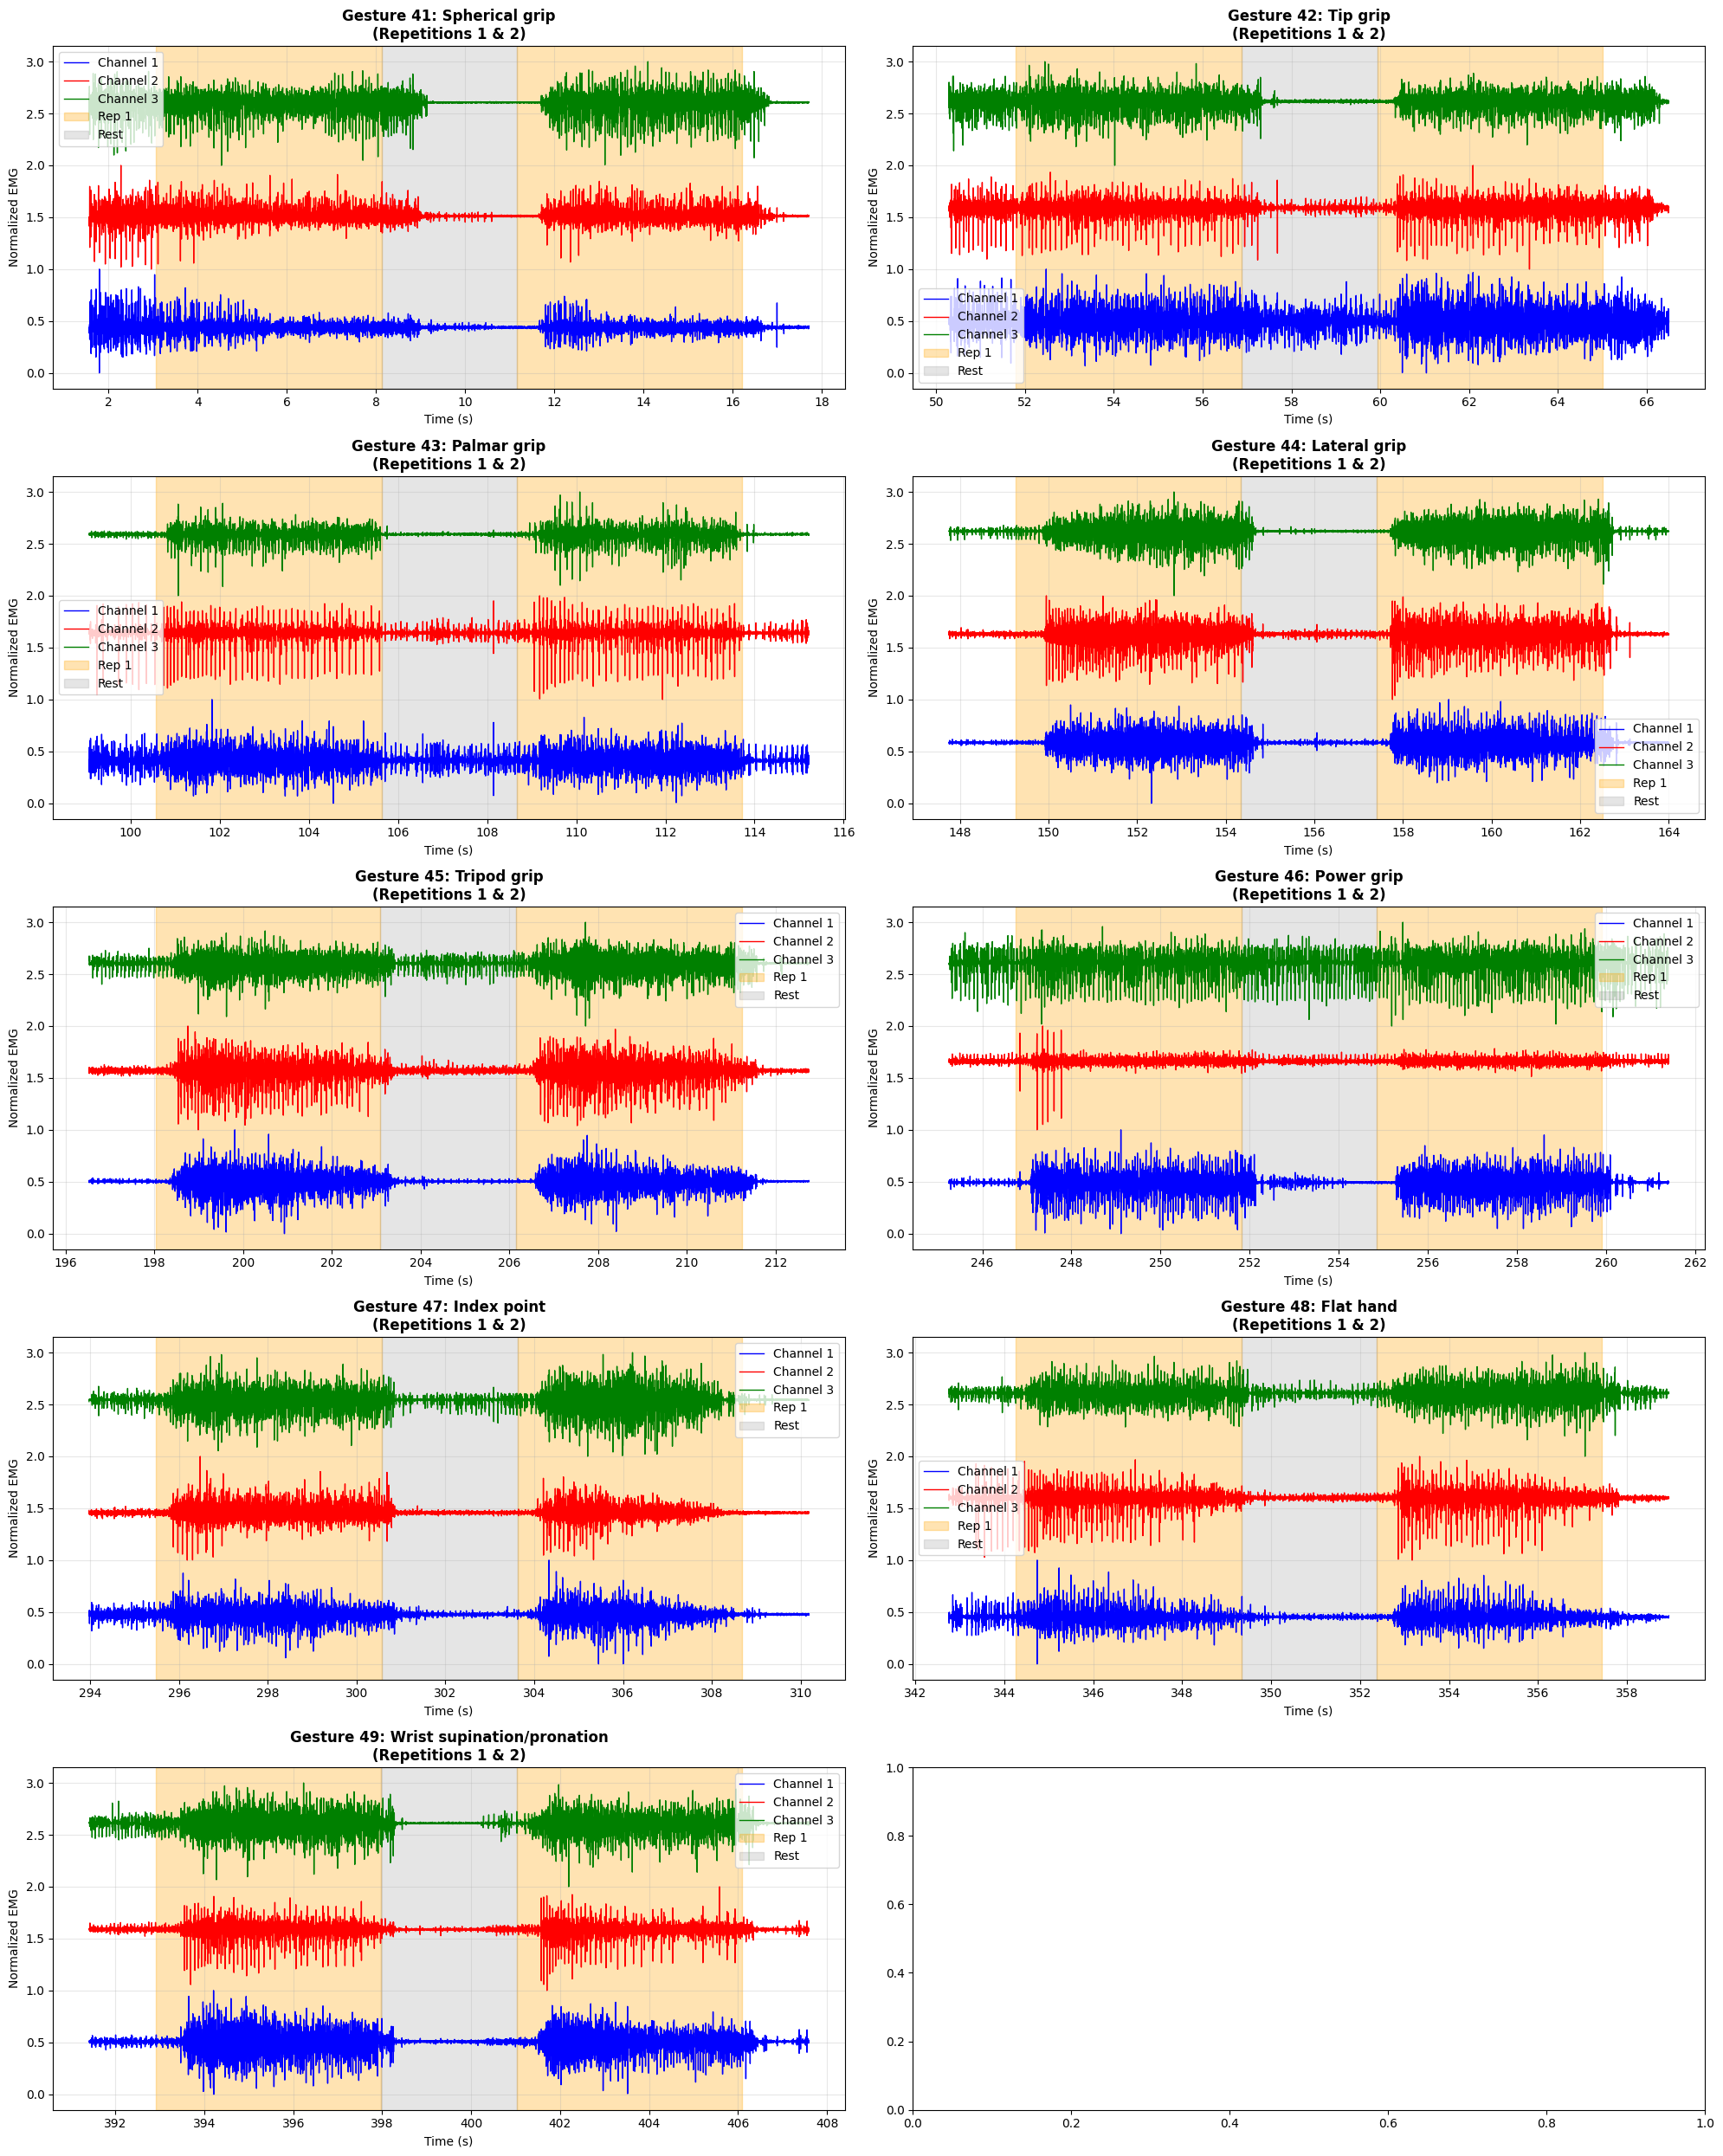

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from matplotlib.patches import Rectangle

# Load data
file_path = '/home/kirill/projects/folium/NIR/analys_data/data/raw/DB2_s1/S1_E3_A1.mat'
data = scipy.io.loadmat(file_path)

# Extract data
emg = data['emg']
stimulus = data['stimulus'].flatten()
repetition = data['repetition'].flatten()

# Parameters
sampling_rate = 2000  # Hz
total_samples = len(stimulus)
total_duration = total_samples / sampling_rate  # seconds

print(f"Total recording duration: {total_duration:.2f} seconds ({total_duration/60:.2f} minutes)")
print(f"Sampling rate: {sampling_rate} Hz")
print(f"Total samples: {total_samples}")

# Gesture labels for Exercise 3
gesture_labels = {
    0: 'Rest',
    41: 'Spherical grip',
    42: 'Tip grip', 
    43: 'Palmar grip',
    44: 'Lateral grip',
    45: 'Tripod grip',
    46: 'Power grip',
    47: 'Index point',
    48: 'Flat hand',
    49: 'Wrist supination/pronation'
}

# Get unique gestures from data
unique_gestures = np.unique(stimulus)
print(f"Unique gesture labels in data: {unique_gestures}")

# Count occurrences of each gesture
gesture_counts = {}
for gesture in unique_gestures:
    count = np.sum(stimulus == gesture)
    gesture_counts[gesture] = count
    gesture_name = gesture_labels.get(gesture, f'Unknown {gesture}')
    print(f"Gesture {gesture} ({gesture_name}): {count} samples ({count/sampling_rate:.2f} seconds)")

# Function to find all gesture transitions
def find_gesture_transitions(stimulus_data):
    """Find all transitions between different gesture states"""
    transitions = []
    current_gesture = stimulus_data[0]
    start_idx = 0
    
    for i in range(1, len(stimulus_data)):
        if stimulus_data[i] != current_gesture:
            # Transition found
            end_idx = i - 1
            transitions.append((start_idx, end_idx, current_gesture))
            current_gesture = stimulus_data[i]
            start_idx = i
    
    # Add the last segment
    transitions.append((start_idx, len(stimulus_data)-1, current_gesture))
    
    return transitions

# Find all transitions
transitions = find_gesture_transitions(stimulus)
print(f"\nTotal gesture segments: {len(transitions)}")

# Create improved repetition structure visualization
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Create a color map for gestures
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_gestures)))
color_map = {gesture: colors[i] for i, gesture in enumerate(unique_gestures)}

# Analyze repetition structure
unique_reps = np.unique(repetition)
print(f"Unique repetition numbers: {unique_reps}")

# Create better repetition structure plot
y_positions = {}
current_y = 0.5

for rep in unique_reps:
    if rep not in y_positions:
        y_positions[rep] = current_y
        current_y += 1

# Plot each repetition as a separate row with better layout
for rep in unique_reps:
    if rep == 0:
        continue  # Skip rest between repetitions
    
    rep_mask = (repetition == rep)
    rep_indices = np.where(rep_mask)[0]
    
    if len(rep_indices) > 0:
        start_time = rep_indices[0] / sampling_rate
        end_time = rep_indices[-1] / sampling_rate
        duration = end_time - start_time
        
        # Plot repetition background
        ax.add_patch(Rectangle((start_time, y_positions[rep]), 
                             duration, 0.8,
                             facecolor='lightblue', alpha=0.2,
                             edgecolor='blue', linewidth=1))
        
        ax.text(start_time + duration/2, y_positions[rep] + 0.4, 
               f'Repetition {rep}', ha='center', va='center', 
               fontweight='bold', fontsize=10, color='darkblue')
        
        # Plot gestures within this repetition
        rep_transitions = []
        current_gesture = stimulus[rep_indices[0]]
        gesture_start = rep_indices[0]
        
        for i in range(1, len(rep_indices)):
            idx = rep_indices[i]
            if stimulus[idx] != current_gesture:
                rep_transitions.append((gesture_start, rep_indices[i-1], current_gesture))
                current_gesture = stimulus[idx]
                gesture_start = idx
        
        rep_transitions.append((gesture_start, rep_indices[-1], current_gesture))
        
        for start, end, gesture in rep_transitions:
            if gesture != 0:  # Only plot active gestures
                start_time_gesture = start / sampling_rate
                end_time_gesture = end / sampling_rate
                duration_gesture = end_time_gesture - start_time_gesture
                
                color = color_map[gesture]
                ax.add_patch(Rectangle((start_time_gesture, y_positions[rep] + 0.1), 
                                     duration_gesture, 0.6,
                                     facecolor=color, alpha=0.8,
                                     edgecolor='black', linewidth=1))
                
                # Add gesture label with better visibility
                if duration_gesture > 1:
                    # Use black text for better contrast
                    text_color = 'black' if np.mean(color[:3]) > 0.5 else 'white'
                    ax.text(start_time_gesture + duration_gesture/2, y_positions[rep] + 0.4, 
                           f'G{gesture}', ha='center', va='center', 
                           fontsize=9, fontweight='bold', color=text_color)

ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Repetition')
ax.set_title('Repetition Structure with Gesture Sequence', fontsize=14, fontweight='bold')
ax.set_yticks([y_positions[rep] + 0.4 for rep in y_positions if rep != 0])
ax.set_yticklabels([f'Rep {rep}' for rep in y_positions if rep != 0])
ax.grid(True, alpha=0.3)
ax.set_xlim(0, total_duration)
ax.set_ylim(0, max(y_positions.values()) + 1)  # Use full canvas height

# Create legend at the bottom
legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor=color_map[gesture], alpha=0.8,
                                label=f'{gesture}: {gesture_labels.get(gesture, "Unknown")}')
                  for gesture in unique_gestures if gesture != 0]  # Exclude rest from legend

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fontsize=10, title='Gesture Legend', ncol=5, frameon=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Add space at bottom for legend
plt.show()

# Analysis of gesture sequence pattern
print("\n" + "="*60)
print("GESTURE SEQUENCE ANALYSIS")
print("="*60)

# Analyze repetition structure
for rep in unique_reps:
    if rep == 0:  # Skip rest periods between repetitions
        continue
        
    rep_mask = (repetition == rep)
    rep_gestures = stimulus[rep_mask]
    unique_gestures_in_rep = np.unique(rep_gestures)
    
    # Remove rest (0) from gesture list for analysis
    active_gestures = [g for g in unique_gestures_in_rep if g != 0]
    
    print(f"\nRepetition {rep}:")
    print(f"  Duration: {np.sum(rep_mask)/sampling_rate:.2f} seconds")
    print(f"  Active gestures: {active_gestures}")
    
    # Analyze each gesture in this repetition
    for gesture in active_gestures:
        gesture_mask = rep_mask & (stimulus == gesture)
        gesture_duration = np.sum(gesture_mask) / sampling_rate
        gesture_name = gesture_labels.get(gesture, f'Unknown {gesture}')
        print(f"    - Gesture {gesture} ({gesture_name}): {gesture_duration:.2f} seconds")

# Final summary
print("\n" + "="*60)
print("EXPERIMENT SUMMARY")
print("="*60)
print(f"Subject: S1")
print(f"Exercise: E3")
print(f"Total recording: {total_duration:.2f} seconds")
print(f"Active gestures: {len([g for g in unique_gestures if g != 0])}")
print(f"Repetitions: {len([r for r in unique_reps if r != 0])}")
print(f"Sampling rate: {sampling_rate} Hz")
print(f"EMG channels: {emg.shape[1]}")

# Keep the previous EMG visualization code as requested
print("\n" + "="*60)
print("PREVIOUS EMG VISUALIZATION (KEPT AS REQUESTED)")
print("="*60)

# Previous EMG visualization code remains here...
def find_gesture_segments(stimulus_data, repetition_data, gesture_id):
    segments = []
    current_rep = 0
    start_idx = 0
    in_gesture = False
    
    for i in range(len(stimulus_data)):
        if stimulus_data[i] == gesture_id and not in_gesture:
            in_gesture = True
            start_idx = i
            current_rep = repetition_data[i]
        elif (stimulus_data[i] != gesture_id or repetition_data[i] != current_rep) and in_gesture:
            in_gesture = False
            segments.append((start_idx, i-1, current_rep))
    
    if in_gesture:
        segments.append((start_idx, len(stimulus_data)-1, current_rep))
    
    return segments

# Scale EMG signals for better visualization
emg_scaled = emg * 1000000  # Convert to microvolts

# Visualization for each gesture (previous code)
gestures = [g for g in np.unique(stimulus) if g != 0]
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

for idx, gesture_id in enumerate(gestures):
    if idx >= len(axes):
        break
        
    ax = axes[idx]
    gesture_name = gesture_labels.get(gesture_id, f'Gesture {gesture_id}')
    
    # Find segments for this gesture
    segments = find_gesture_segments(stimulus, repetition, gesture_id)
    
    if len(segments) >= 2:
        # Take first 2 repetitions with context
        start_segment = max(0, segments[0][0] - 3000)  # 1.5 sec before
        end_segment = segments[1][1] + 3000  # 1.5 sec after
        
        # Extract data
        time_axis = np.arange(start_segment, end_segment) / sampling_rate
        emg_segment = emg_scaled[start_segment:end_segment]
        stimulus_segment = stimulus[start_segment:end_segment]
        
        # Visualize first 3 EMG channels
        channels_to_plot = [0, 1, 2]
        colors = ['blue', 'red', 'green']
        
        for ch, color in zip(channels_to_plot, colors):
            # Normalize each channel for better display
            channel_data = emg_segment[:, ch]
            if np.max(channel_data) - np.min(channel_data) > 0:
                normalized_channel = (channel_data - np.min(channel_data)) / (np.max(channel_data) - np.min(channel_data))
                ax.plot(time_axis, normalized_channel + ch, color=color, linewidth=1, label=f'Channel {ch+1}')
        
        # Mark gestures and rest
        y_min, y_max = ax.get_ylim()
        
        # Mark gestures
        for seg_start, seg_end, rep in segments[:2]:
            if seg_start >= start_segment and seg_end <= end_segment:
                seg_start_time = seg_start / sampling_rate
                seg_end_time = seg_end / sampling_rate
                ax.add_patch(Rectangle((seg_start_time, y_min), 
                                     seg_end_time - seg_start_time, 
                                     y_max - y_min, 
                                     alpha=0.3, color='orange',
                                     label=f'Rep {rep}' if seg_start == segments[0][0] else ""))
        
        # Mark rest between gestures
        rest_start = segments[0][1] / sampling_rate
        rest_end = segments[1][0] / sampling_rate
        ax.add_patch(Rectangle((rest_start, y_min), 
                             rest_end - rest_start, 
                             y_max - y_min, 
                             alpha=0.2, color='gray', label='Rest'))
        
        ax.set_title(f'Gesture {gesture_id}: {gesture_name}\n(Repetitions {segments[0][2]} & {segments[1][2]})', 
                    fontsize=12, fontweight='bold')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Normalized EMG')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
    else:
        ax.text(0.5, 0.5, f'Not enough data\nfor gesture {gesture_id}', 
               ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Gesture {gesture_id}: {gesture_name}')

plt.tight_layout()
plt.show()

Total segments: 108
Total recording duration: 438.54 seconds

DETAILED DURATION STATISTICS

Gesture 0 (Rest):
  Count: 54
  Total time: 164.8s
  Average duration: 3.05s
  Min duration: 3.03s
  Max duration: 3.10s
  Std duration: 0.02s

Gesture 41 (Spherical grip):
  Count: 6
  Total time: 30.4s
  Average duration: 5.07s
  Min duration: 5.03s
  Max duration: 5.10s
  Std duration: 0.02s

Gesture 42 (Tip grip):
  Count: 6
  Total time: 30.4s
  Average duration: 5.07s
  Min duration: 5.03s
  Max duration: 5.09s
  Std duration: 0.02s

Gesture 43 (Palmar grip):
  Count: 6
  Total time: 30.4s
  Average duration: 5.06s
  Min duration: 5.03s
  Max duration: 5.09s
  Std duration: 0.02s

Gesture 44 (Lateral grip):
  Count: 6
  Total time: 30.5s
  Average duration: 5.08s
  Min duration: 5.06s
  Max duration: 5.09s
  Std duration: 0.02s

Gesture 45 (Tripod grip):
  Count: 6
  Total time: 30.4s
  Average duration: 5.07s
  Min duration: 5.03s
  Max duration: 5.09s
  Std duration: 0.02s

Gesture 46 (P

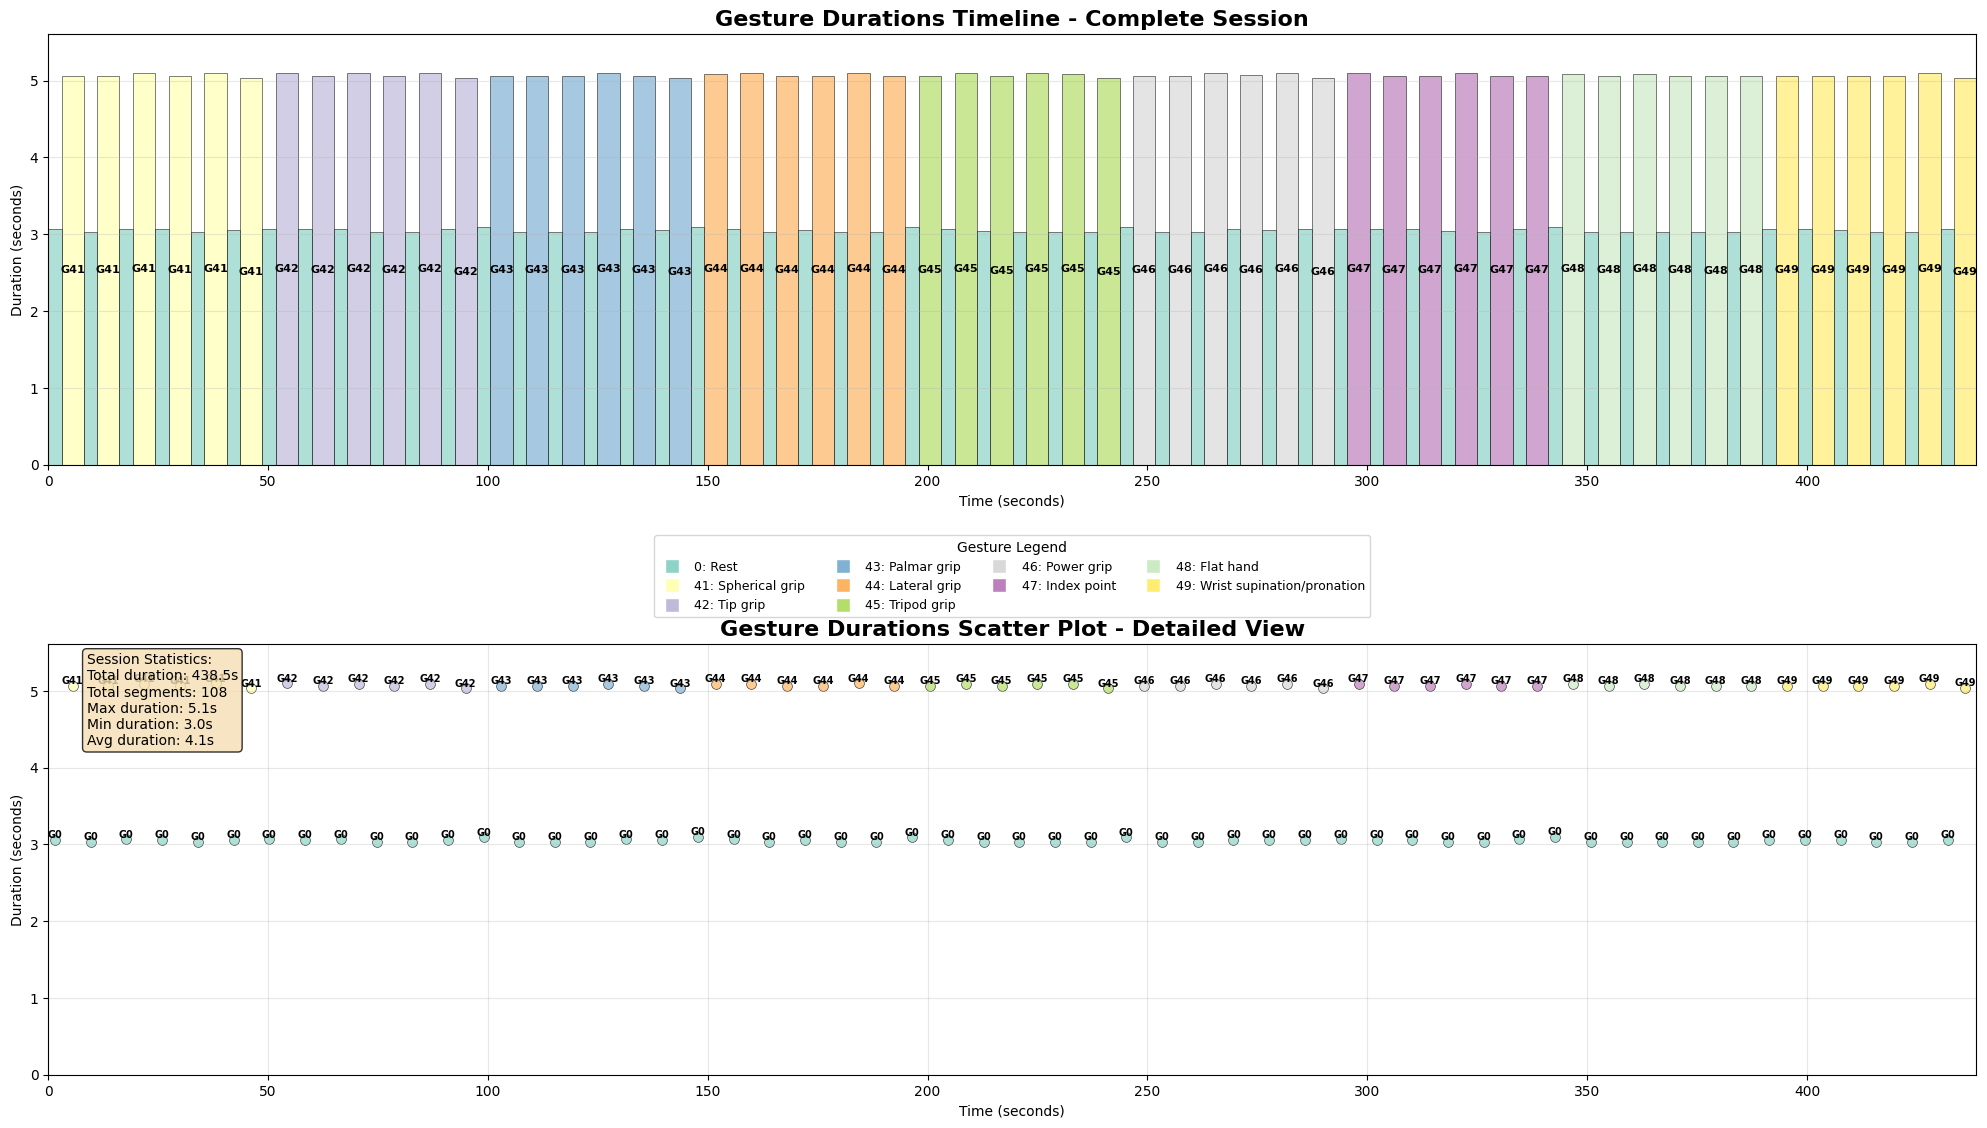

/tmp/ipykernel_218354/1969047137.py:233: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plots = ax.boxplot(box_plot_data, labels=box_plot_labels, patch_artist=True)


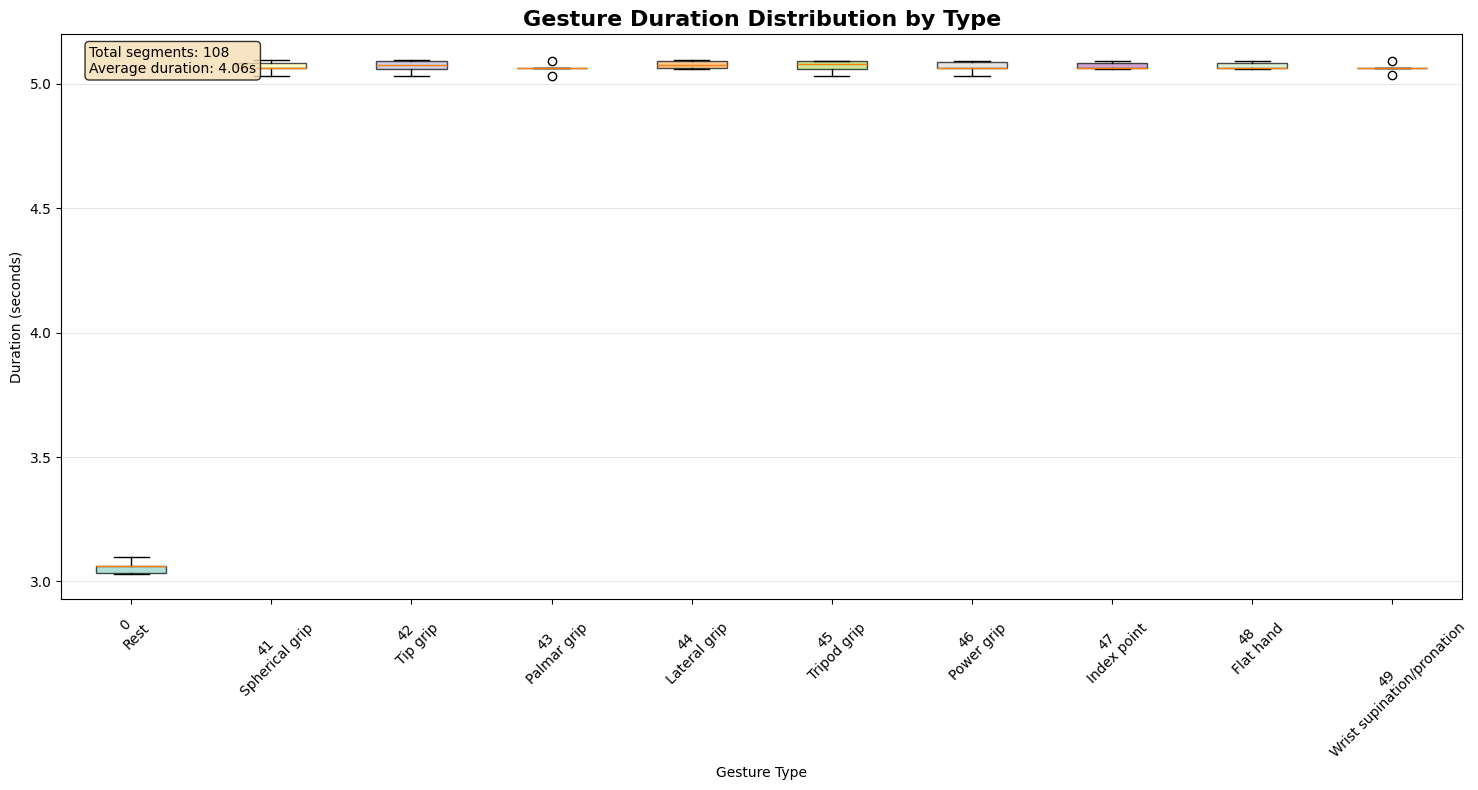

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from matplotlib.patches import Rectangle

def plot_gesture_durations_timeline(file_path):
    """
    Plot gesture durations timeline for entire session
    Shows the duration of each gesture (including rest) over time
    """
    # Load data
    data = scipy.io.loadmat(file_path)
    
    # Extract data
    stimulus = data['stimulus'].flatten()
    repetition = data['repetition'].flatten()
    
    # Parameters
    sampling_rate = 2000  # Hz
    total_samples = len(stimulus)
    total_duration = total_samples / sampling_rate  # seconds
    
    # Gesture labels for Exercise 3
    gesture_labels = {
        0: 'Rest',
        41: 'Spherical grip',
        42: 'Tip grip', 
        43: 'Palmar grip',
        44: 'Lateral grip',
        45: 'Tripod grip',
        46: 'Power grip',
        47: 'Index point',
        48: 'Flat hand',
        49: 'Wrist supination/pronation'
    }
    
    # Get unique gestures from data
    unique_gestures = np.unique(stimulus)
    
    # Create color map for gestures
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_gestures)))
    color_map = {gesture: colors[i] for i, gesture in enumerate(unique_gestures)}
    
    # Function to find all gesture segments with durations
    def find_gesture_segments_with_duration(stimulus_data):
        """Find all gesture segments with their durations and start times"""
        segments = []
        current_gesture = stimulus_data[0]
        start_idx = 0
        
        for i in range(1, len(stimulus_data)):
            if stimulus_data[i] != current_gesture:
                # Transition found
                end_idx = i - 1
                duration = (end_idx - start_idx + 1) / sampling_rate
                segments.append({
                    'start_idx': start_idx,
                    'end_idx': end_idx,
                    'start_time': start_idx / sampling_rate,
                    'end_time': end_idx / sampling_rate,
                    'duration': duration,
                    'gesture': current_gesture
                })
                current_gesture = stimulus_data[i]
                start_idx = i
        
        # Add the last segment
        duration = (len(stimulus_data) - 1 - start_idx + 1) / sampling_rate
        segments.append({
            'start_idx': start_idx,
            'end_idx': len(stimulus_data) - 1,
            'start_time': start_idx / sampling_rate,
            'end_time': (len(stimulus_data) - 1) / sampling_rate,
            'duration': duration,
            'gesture': current_gesture
        })
        
        return segments
    
    # Find all segments with durations
    segments = find_gesture_segments_with_duration(stimulus)
    
    print(f"Total segments: {len(segments)}")
    print(f"Total recording duration: {total_duration:.2f} seconds")
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
    
    # Plot 1: Duration bars over time
    segment_start_times = [seg['start_time'] for seg in segments]
    segment_durations = [seg['duration'] for seg in segments]
    segment_gestures = [seg['gesture'] for seg in segments]
    
    # Create bars for each segment
    bars = []
    for i, (start_time, duration, gesture) in enumerate(zip(segment_start_times, segment_durations, segment_gestures)):
        color = color_map[gesture]
        bar = ax1.bar(start_time + duration/2, duration, width=duration, 
                     color=color, alpha=0.7, edgecolor='black', linewidth=0.5,
                     align='center')
        bars.append(bar)
        
        # Add gesture label for longer segments
        if duration > 5:  # Only label segments longer than 5 seconds
            ax1.text(start_time + duration/2, duration/2, f'G{gesture}', 
                    ha='center', va='center', fontsize=8, fontweight='bold',
                    color='white' if np.mean(color[:3]) < 0.6 else 'black')
    
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Duration (seconds)')
    ax1.set_title('Gesture Durations Timeline - Complete Session', fontsize=16, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_xlim(0, total_duration)
    
    # Set y-axis to show reasonable duration range
    max_duration = max(segment_durations)
    ax1.set_ylim(0, max_duration * 1.1)
    
    # Plot 2: Duration points scatter plot (more detailed view)
    for i, (start_time, duration, gesture) in enumerate(zip(segment_start_times, segment_durations, segment_gestures)):
        color = color_map[gesture]
        ax2.scatter(start_time + duration/2, duration, color=color, s=50, alpha=0.7, 
                   edgecolors='black', linewidth=0.5)
        
        # Add text label for significant segments
        if duration > max_duration * 0.1:  # Label segments longer than 10% of max duration
            ax2.text(start_time + duration/2, duration, f'G{gesture}', 
                    ha='center', va='bottom', fontsize=7, fontweight='bold')
    
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Duration (seconds)')
    ax2.set_title('Gesture Durations Scatter Plot - Detailed View', fontsize=16, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(0, total_duration)
    ax2.set_ylim(0, max_duration * 1.1)
    
    # Create comprehensive legend
    legend_elements = [plt.Line2D([0], [0], marker='s', color='w', 
                                markerfacecolor=color_map[gesture], markersize=10,
                                label=f'{gesture}: {gesture_labels.get(gesture, "Unknown")}')
                      for gesture in unique_gestures]
    
    ax1.legend(handles=legend_elements, loc='upper center', 
              bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=9,
              title='Gesture Legend', frameon=True)
    
    # Add statistics text box
    stats_text = f"Session Statistics:\n"
    stats_text += f"Total duration: {total_duration:.1f}s\n"
    stats_text += f"Total segments: {len(segments)}\n"
    stats_text += f"Max duration: {max_duration:.1f}s\n"
    stats_text += f"Min duration: {min(segment_durations):.1f}s\n"
    stats_text += f"Avg duration: {np.mean(segment_durations):.1f}s"
    
    ax2.text(0.02, 0.98, stats_text, transform=ax2.transAxes, 
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)  # Adjust for legend
    
    # Print detailed statistics
    print("\n" + "="*60)
    print("DETAILED DURATION STATISTICS")
    print("="*60)
    
    for gesture in unique_gestures:
        gesture_segments = [seg for seg in segments if seg['gesture'] == gesture]
        if gesture_segments:
            durations = [seg['duration'] for seg in gesture_segments]
            gesture_name = gesture_labels.get(gesture, f'Unknown {gesture}')
            print(f"\nGesture {gesture} ({gesture_name}):")
            print(f"  Count: {len(gesture_segments)}")
            print(f"  Total time: {sum(durations):.1f}s")
            print(f"  Average duration: {np.mean(durations):.2f}s")
            print(f"  Min duration: {min(durations):.2f}s")
            print(f"  Max duration: {max(durations):.2f}s")
            print(f"  Std duration: {np.std(durations):.2f}s")
    
    return fig, segments

# Additional method to plot duration distribution by gesture type
def plot_gesture_duration_distribution(segments, file_path):
    """
    Plot duration distribution for each gesture type
    """
    # Load data for gesture labels
    data = scipy.io.loadmat(file_path)
    stimulus = data['stimulus'].flatten()
    
    # Gesture labels
    gesture_labels = {
        0: 'Rest',
        41: 'Spherical grip',
        42: 'Tip grip', 
        43: 'Palmar grip',
        44: 'Lateral grip',
        45: 'Tripod grip',
        46: 'Power grip',
        47: 'Index point',
        48: 'Flat hand',
        49: 'Wrist supination/pronation'
    }
    
    unique_gestures = np.unique(stimulus)
    
    # Create color map
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_gestures)))
    color_map = {gesture: colors[i] for i, gesture in enumerate(unique_gestures)}
    
    # Group segments by gesture
    gesture_groups = {}
    for gesture in unique_gestures:
        gesture_segments = [seg for seg in segments if seg['gesture'] == gesture]
        if gesture_segments:
            gesture_groups[gesture] = [seg['duration'] for seg in gesture_segments]
    
    # Create box plot
    fig, ax = plt.subplots(figsize=(15, 8))
    
    box_plot_data = []
    box_plot_labels = []
    box_plot_colors = []
    
    for gesture in unique_gestures:
        if gesture in gesture_groups:
            box_plot_data.append(gesture_groups[gesture])
            gesture_name = gesture_labels.get(gesture, f'G{gesture}')
            box_plot_labels.append(f'{gesture}\n{gesture_name}')
            box_plot_colors.append(color_map[gesture])
    
    # Create box plot
    box_plots = ax.boxplot(box_plot_data, labels=box_plot_labels, patch_artist=True)
    
    # Color the boxes
    for patch, color in zip(box_plots['boxes'], box_plot_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_xlabel('Gesture Type')
    ax.set_ylabel('Duration (seconds)')
    ax.set_title('Gesture Duration Distribution by Type', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    plt.xticks(rotation=45)
    
    # Add statistics text
    total_segments = sum(len(durations) for durations in box_plot_data)
    avg_duration = np.mean([dur for sublist in box_plot_data for dur in sublist])
    
    stats_text = f"Total segments: {total_segments}\nAverage duration: {avg_duration:.2f}s"
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    
    return fig

# Usage example:
if __name__ == "__main__":
    file_path = '/home/kirill/projects/folium/NIR/analys_data/data/raw/DB2_s1/S1_E3_A1.mat'
    
    # Plot gesture durations timeline
    fig_timeline, segments = plot_gesture_durations_timeline(file_path)
    plt.show()
    
    # Plot duration distribution
    fig_distribution = plot_gesture_duration_distribution(segments, file_path)
    plt.show()